In [1]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

## Ajuste de las Variables

In [2]:
# Importamos los dos ficheros el train y el test
url1 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/DengAI%3A%20Predicting%20Disease%20Spread/dengue_features_test.csv'
dftest = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/DengAI%3A%20Predicting%20Disease%20Spread/dengue_features_train.csv'
dftrain = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/DengAI%3A%20Predicting%20Disease%20Spread/dengue_labels_train.csv'
dftrainlabel = pd.read_csv(url3)

In [3]:
dftrain['total_cases'] = dftrainlabel["total_cases"]

In [4]:
#Rellenamos los valores que se encuentran nulos
dftrain = dftrain.fillna(dftrain.rolling(20, min_periods=1).mean())
dftest = dftest.fillna(dftest.rolling(20, min_periods=1).mean())

A continuación, lo que vamos a hacer es quitar o sustituir los valores que yo considere oportunos para poder empezar con el estudio de los datos.

In [5]:
dftrain.drop(['reanalysis_max_air_temp_k'], axis = 1, inplace=True)
dftrain.drop(['reanalysis_min_air_temp_k'], axis = 1, inplace=True)

dftest.drop(['reanalysis_max_air_temp_k'], axis = 1, inplace=True)
dftest.drop(['reanalysis_min_air_temp_k'], axis = 1, inplace=True)

In [6]:

dftrain.drop(['station_max_temp_c'], axis = 1, inplace=True)
dftrain.drop(['station_min_temp_c'], axis = 1, inplace=True)

dftest.drop(['station_max_temp_c'], axis = 1, inplace=True)
dftest.drop(['station_min_temp_c'], axis = 1, inplace=True)

In [7]:
dftrain.drop(['week_start_date'], axis = 1, inplace=True)
dftest.drop(['week_start_date'], axis = 1, inplace=True)

Y antes de hacer la Matriz de correlación lo que vamos a hacer es pasar todos los datos categóricos a numéricos.

In [8]:
dftrain.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [9]:
dftrain['city'] = dftrain['city'].replace({'sj': 0, 'iq': 1})
dftest['city'] = dftest['city'].replace({'sj': 0, 'iq': 1})

## Matríz de Correlación

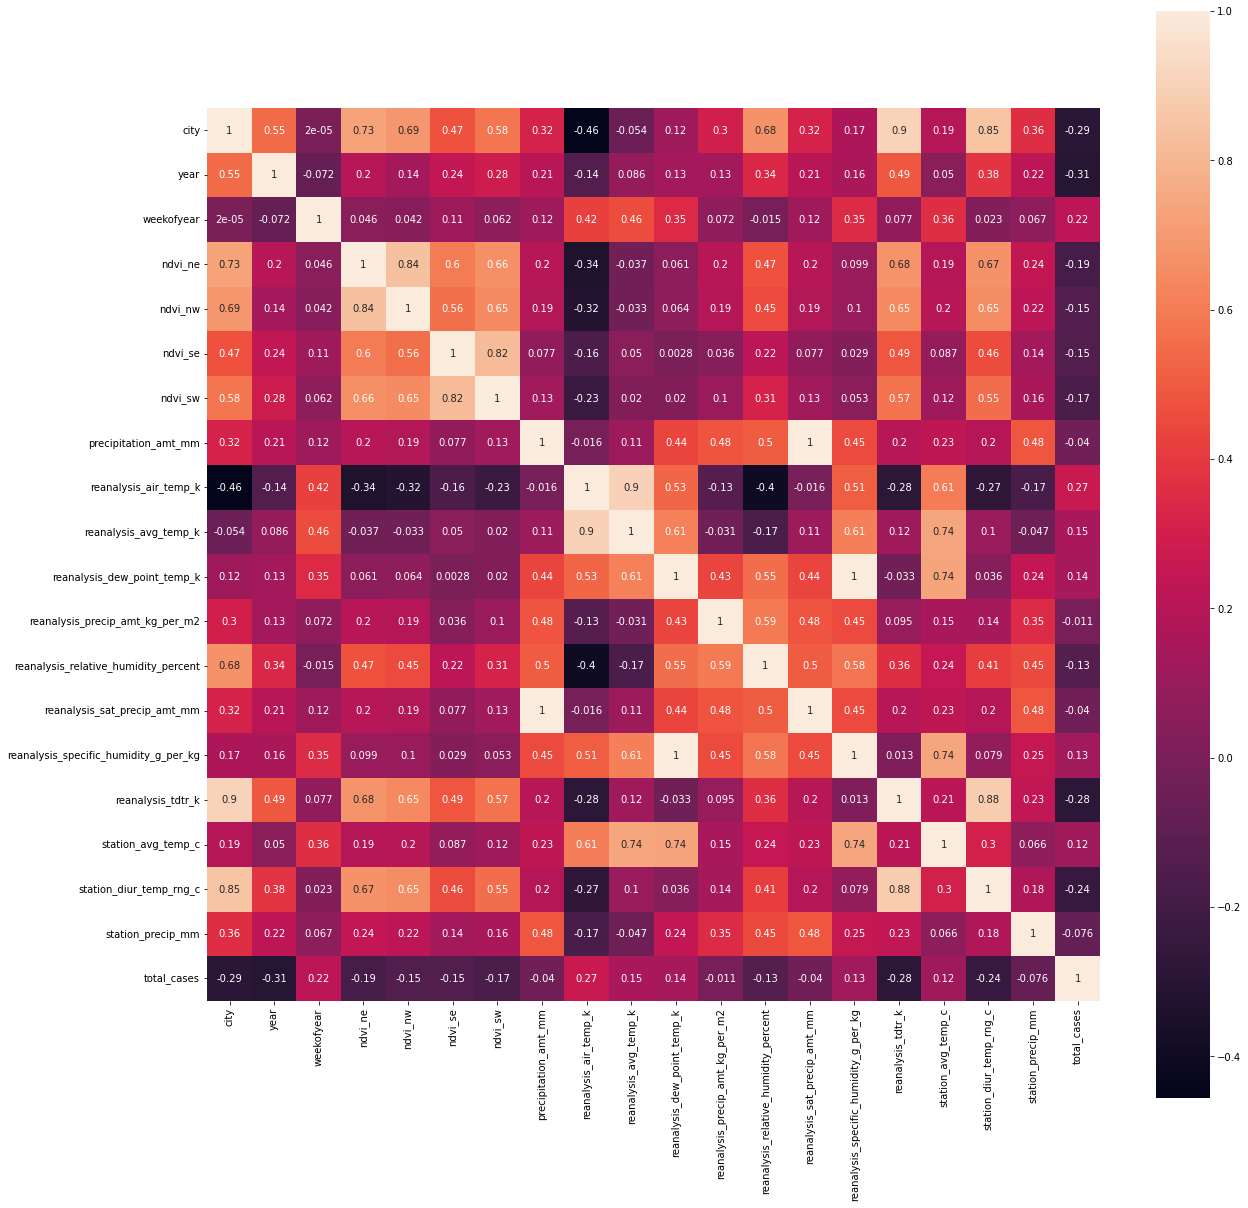

In [10]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(dftrain.corr(), annot=True, square=True)
plt.show()

In [11]:
from numpy.core import numeric
from sklearn.model_selection import train_test_split

# separamos datos de entrada y salida
dftrain = dftrain.loc[(dftrain['year'] >= 2008)  &  (dftrain['year'] <= 2010)]
X = dftrain.drop('total_cases', axis=1)
y = dftrain['total_cases']

# separamos train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

# Modelo KNN de Regression con cross validation

Min Value uniform : 8.179797979797979 (11)
Min Value distance : 8.112657337727999 (11)


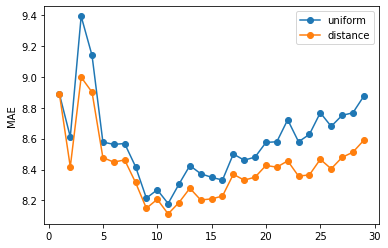

In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


cv = TimeSeriesSplit(n_splits = 5) #
x_train.reset_index(drop = True, inplace = True) # reinicia índice

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(x_train):
          # División train test aleatoria
          f_train = x_train.loc[train_fold]
          f_test = x_train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(x_train,y_train)
          y_pred = knn.predict(x_test)
          # evaluación del modelo
          mae = mean_absolute_error(y_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')     

plt.legend()
plt.show()

### Matriz de Dispersión

Text(0, 0.5, 'Predicted total_cases')

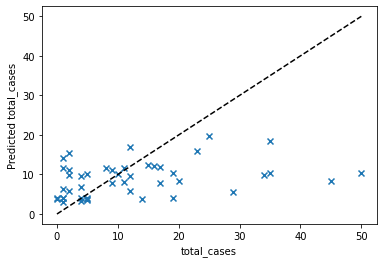

In [13]:
import matplotlib.pyplot as plt

knn = KNeighborsRegressor(n_neighbors= 11, weights= "distance")

knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

plt.scatter(y_test, y_pred , marker = 'x')
plt.plot([0, 50], [0, 50], "--k")
plt.axis("tight")
plt.xlabel("total_cases")
plt.ylabel("Predicted total_cases")

# Interpretación de la gráfica:
# En la diagonal están los valores de test, y los puntos dispersos son las predicción. De esta forma podemos ver lo cerca/lejos que están los resultados
# predichos de los de entrenamiento
# Cuanto más cerca están las X de la recta mejor será la predicción.

# Descargar el modelo predicho

In [14]:
y_pred = knn.predict(dftest)
y_pred = y_pred.astype(int)

In [15]:
url4 = 'https://raw.githubusercontent.com/Ruben11040/Proyectos_Colab/main/DengAI%3A%20Predicting%20Disease%20Spread/submission_format.csv'
dfsubmission = pd.read_csv(url4)
dfsubmission['total_cases'] = y_pred

In [16]:
# dfsubmission.to_csv('resultado.csv', index=False)